In [1]:
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

import os.path as op
import sys
sys.path.append("../")

from src import regmod
from src import utils

## Synthetic model

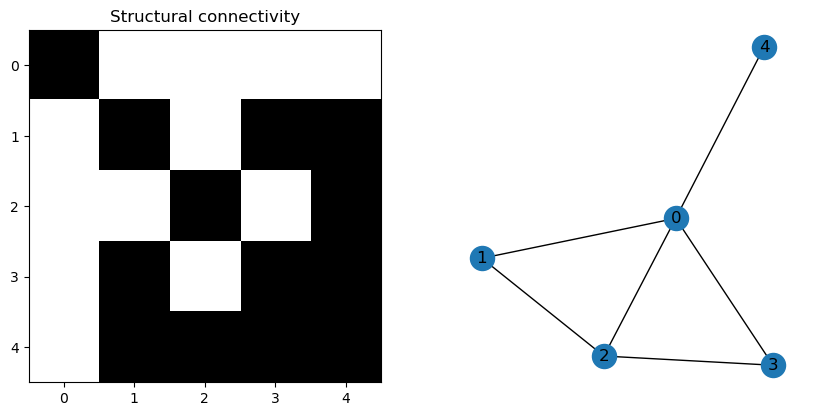

In [2]:
path_to_data = "../resources"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

filename = "adjacency_synthetic.pkl"

adj = utils.load(op.join(path_to_data, filename))
adj -= np.diag(np.diag(adj))

axes[0].imshow(adj, cmap='gray')
axes[0].set_title('Structural connectivity')
toy_graph = nx.Graph(adj)
nx.draw(toy_graph, ax=axes[1], with_labels=True)

  0%|          | 0/20 [00:00<?, ?it/s]

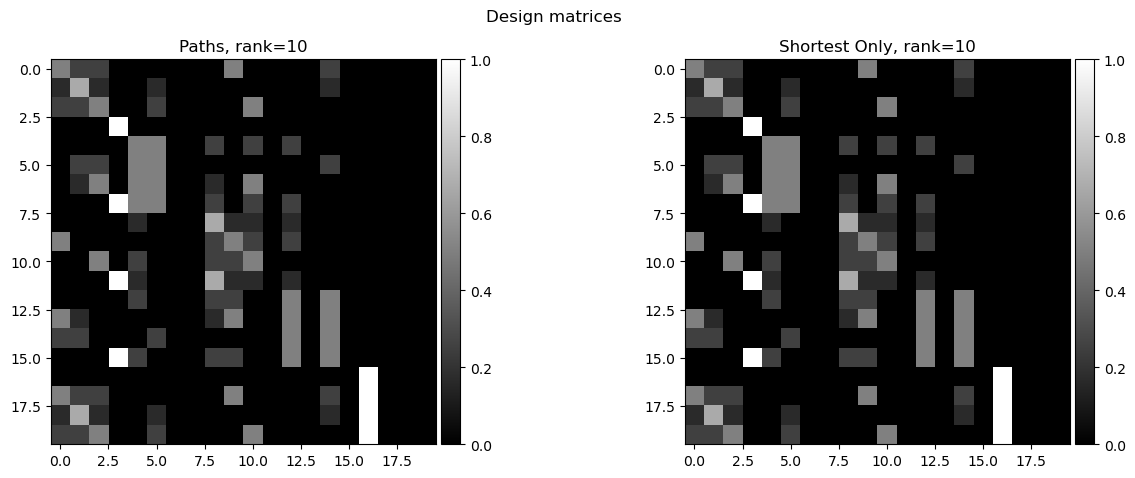

In [48]:
import importlib
importlib.reload(regmod)

max_path_depth = 4
alpha = 0.5

design_per_hops = regmod.get_path_matrices(adj, max_path_depth)
a_design_path = regmod.combine_paths_matrices(design_per_hops, alpha=alpha)

shortest = regmod.build_design_shortest(adj, n_subopt=2, alpha=alpha)

# Old degree designs
#a_design_degree_row = regmod.build_design_degree_fast(adj, target_deg=False)
#a_design_degree_col = regmod.build_design_degree_fast(adj, target_deg=True)

all_designs = [a_design_path, shortest] #, a_design_degree_row, a_design_degree_col]
all_titles = ["Paths", "Shortest Only"] #, "Degree Row", "Degree Col"]

fig, axes = plt.subplots(nrows=1, ncols=len(all_designs), figsize=(15, 5))
fig.suptitle("Design matrices")

for mat, axes, title in zip(all_designs, np.atleast_1d(axes), all_titles):
    axes.set_title(title + f", rank={np.linalg.matrix_rank(mat)}")
    axes.imshow(mat, cmap='gray')
    utils.add_cbar(fig, axes)

In [50]:
%%timeit

shortest = regmod.build_design_shortest(adj, n_subopt=2, alpha=alpha)

216 µs ± 2.68 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
import importlib
importlib.reload(regmod)

shortest = regmod.build_design_shortest(adj, n_subopt=2, alpha=alpha)

Zooming into the path desing matrix:

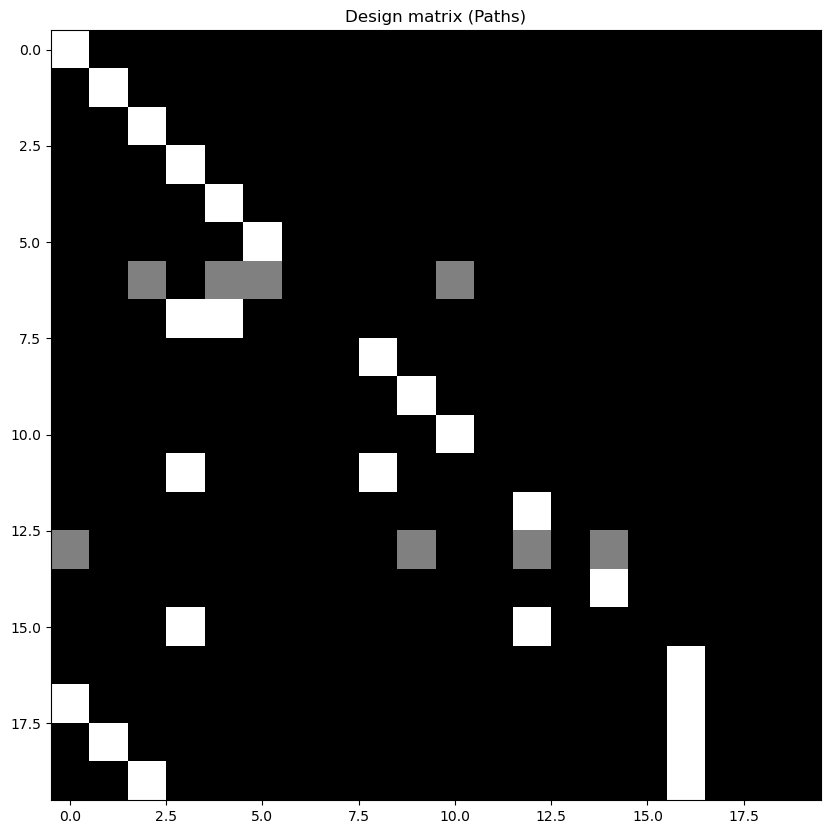

In [4]:
fig, axes = plt.subplots(figsize=(10, 10))

axes.set_title("Design matrix (Paths)")
axes.imshow(a_design_path, cmap='gray', vmin=0, interpolation="none")

## Structural connectome (WM Bundles)

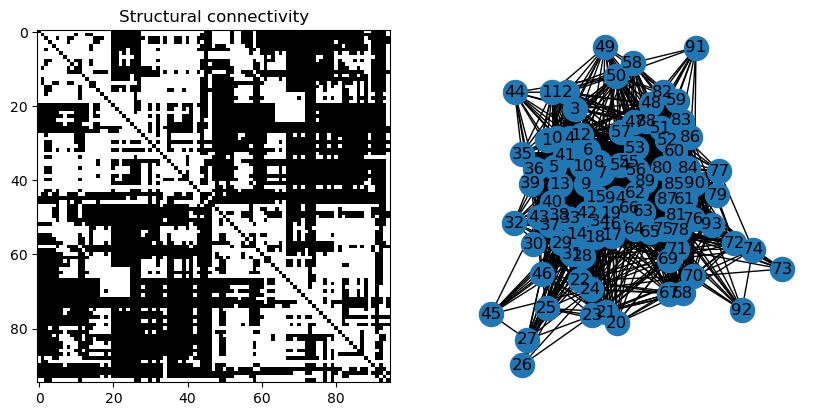

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

filename = "adjacency_atlas.pkl"

adj_sc = utils.load(op.join(path_to_data, filename))
adj_sc -= np.diag(np.diag(adj_sc))

axes[0].imshow(adj_sc, cmap='gray')
axes[0].set_title('Structural connectivity')
toy_graph_sc = nx.Graph(adj_sc)
nx.draw(toy_graph_sc, ax=axes[1], with_labels=True)

  0%|          | 0/1560 [00:00<?, ?it/s]

Early stopping !


(<Figure size 1000x1000 with 4 Axes>,
 <Axes: title={'center': 'Design matix (Shortest)'}>)

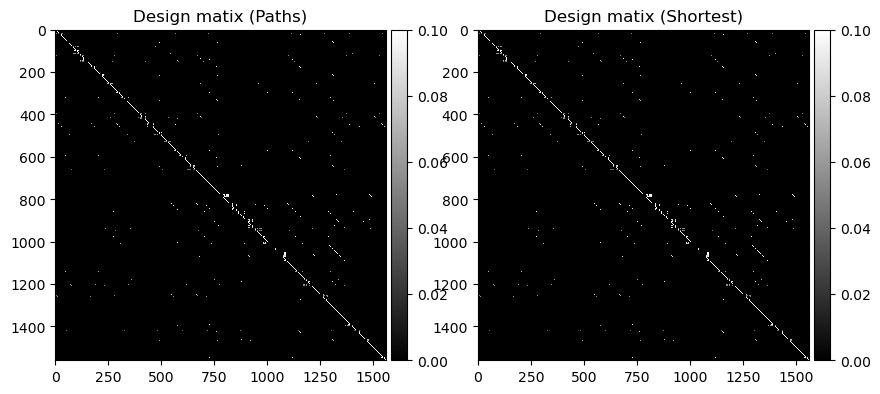

In [6]:
import importlib
importlib.reload(regmod)

max_path_depth = 2
alpha = 0

sub_sample = 40

design_per_hops = regmod.get_path_matrices(adj_sc[:sub_sample][:, :sub_sample], max_path_depth)
a_design_sc_path = regmod.combine_paths_matrices(design_per_hops, alpha=alpha)

design_shortest_sc = regmod.build_design_shortest(adj_sc[:sub_sample][:, :sub_sample], n_subopt=1, alpha=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10))

axes[0].set_title("Design matix (Paths)")
axes[0].imshow(a_design_sc_path, cmap='gray',
                vmin=0, vmax=.1, interpolation="none")
utils.add_cbar(fig, axes[0])

axes[1].set_title("Design matix (Shortest)")
axes[1].imshow(design_shortest_sc, cmap='gray',
                vmin=0, vmax=.1, interpolation="none")
utils.add_cbar(fig, axes[1])
